In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the data
df=pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

# **Lets see the dataset of netflix**

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Understanding more about data features 

In [4]:
#Head of the data
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [6]:
df.listed_in.value_counts().head(10)

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: listed_in, dtype: int64

In [7]:
#describe the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.shape

(8807, 12)

In [9]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# **Data cleaning and preparation**

In [10]:
#check missing values
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [11]:
#check missing values in percentage
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False) 

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

In [12]:
#Dropping rows for small percentages of null

df.dropna(subset=["rating","duration"],axis=0, inplace=True)

In [13]:
df.shape

(8800, 12)

In [14]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.90
country          9.43
cast             9.38
date_added       0.11
show_id          0.00
type             0.00
title            0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [15]:
df.dropna(subset=["date_added"],axis=0, inplace=True)

In [16]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
country          9.43
cast             9.39
show_id          0.00
type             0.00
title            0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [17]:
#Replacing missing values in country with "unknown"
df["country"].replace(np.NaN,"unknown", inplace=True)

In [18]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
cast             9.39
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [19]:
#Replace missing values in cast with "No cast"
df["cast"].replace(np.NaN,"No Cast", inplace=True)

In [20]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

director        29.82
show_id          0.00
type             0.00
title            0.00
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [21]:
df["director"].replace(np.NaN,"No director", inplace=True)

In [22]:
round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [23]:
df['title'].head(5)

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [24]:
df["director"].value_counts().head(10)

No director               2621
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Jay Chapman                 12
Youssef Chahine             12
Name: director, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

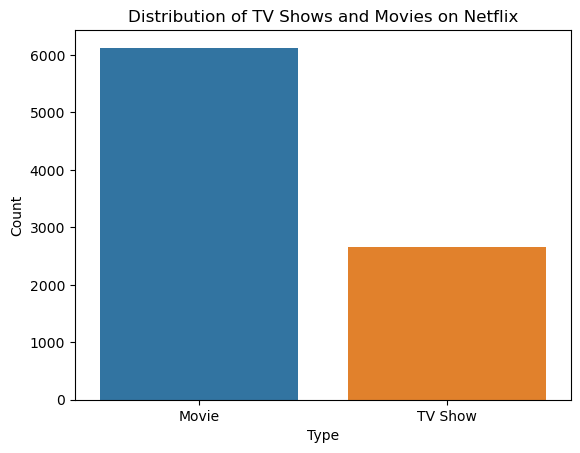

In [25]:
# Type of Content Distribution
sns.countplot(x='type', data=df)
plt.title('Distribution of TV Shows and Movies on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# -> Netflix has a larger number of movies compared to TV shows in its library.


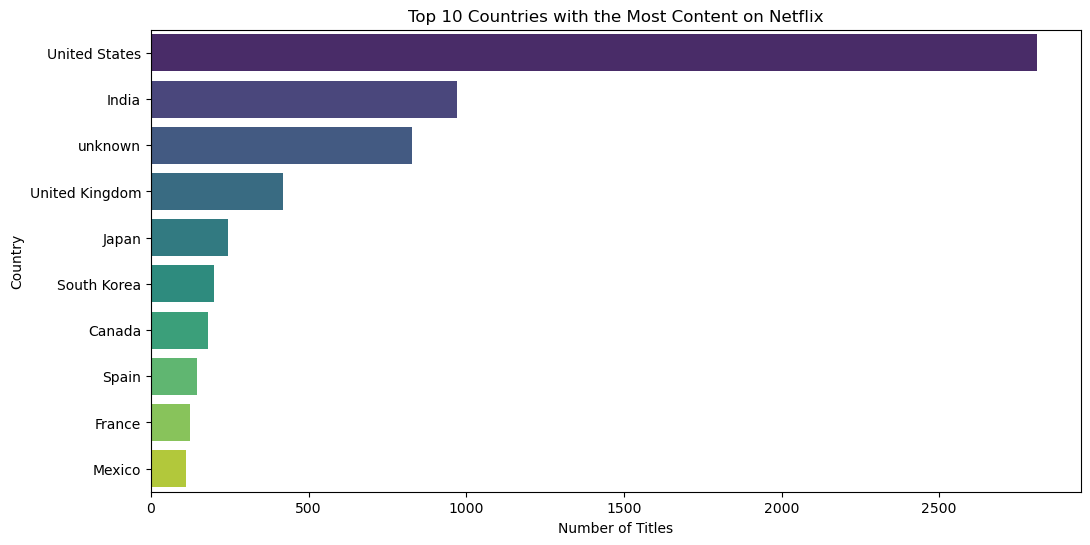

In [26]:
# Content Distribution by Country
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# ->The United States has the highest number of titles on Netflix, followed by India and the United Kingdom. These three countries dominate the content library.

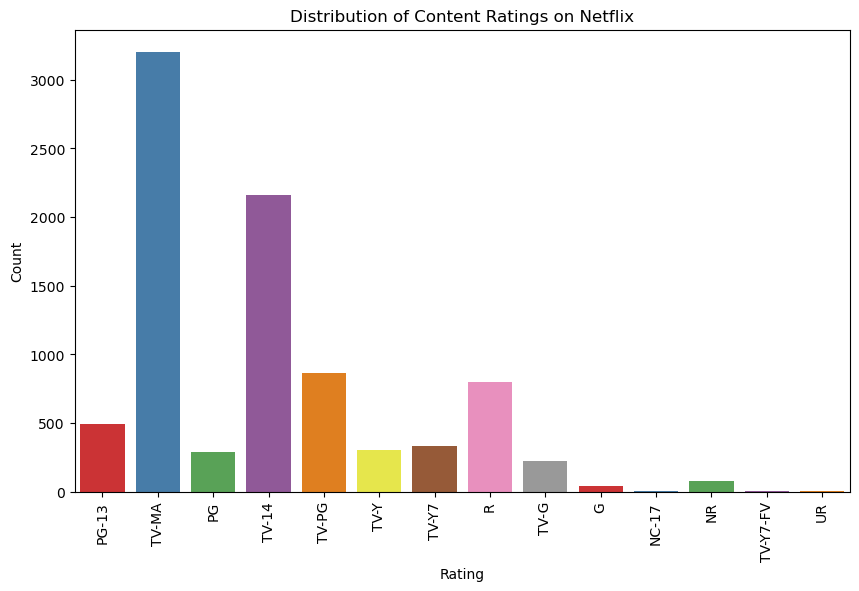

In [27]:
#Content Distribution by Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='Set1')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# ->The most common content rating on Netflix is TV-MA (Mature Audience), followed by TV-14 (Parents Strongly Cautioned). This suggests that a significant portion of Netflix's content is intended for mature audiences.


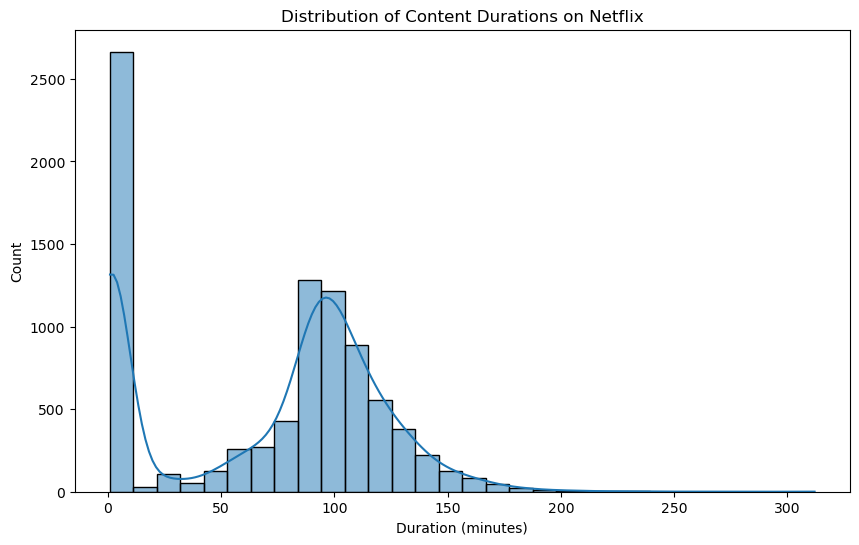

In [28]:
#Content Duration Analysis
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration', bins=30, kde=True)
plt.title('Distribution of Content Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# ->The majority of content on Netflix has a duration of around 100 minutes. There is a wide range of content durations, with some movies and TV shows being significantly longer or shorter.

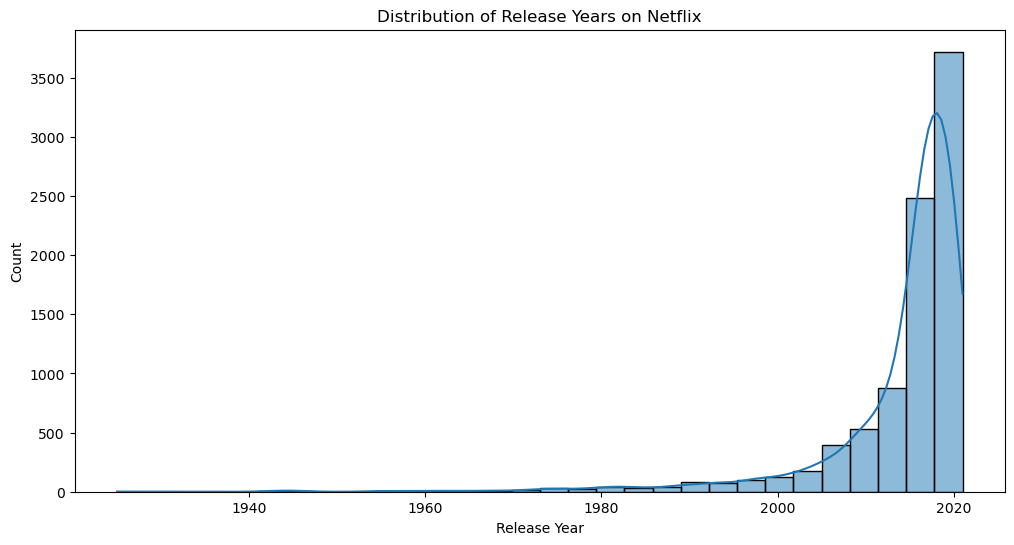

In [29]:
#Release Year Analysis
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=True)
plt.title('Distribution of Release Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# ->The distribution of release years is right-skewed, with a larger number of titles being released in recent years. This indicates that Netflix's content library is continually growing and includes a mix of old and new titles.

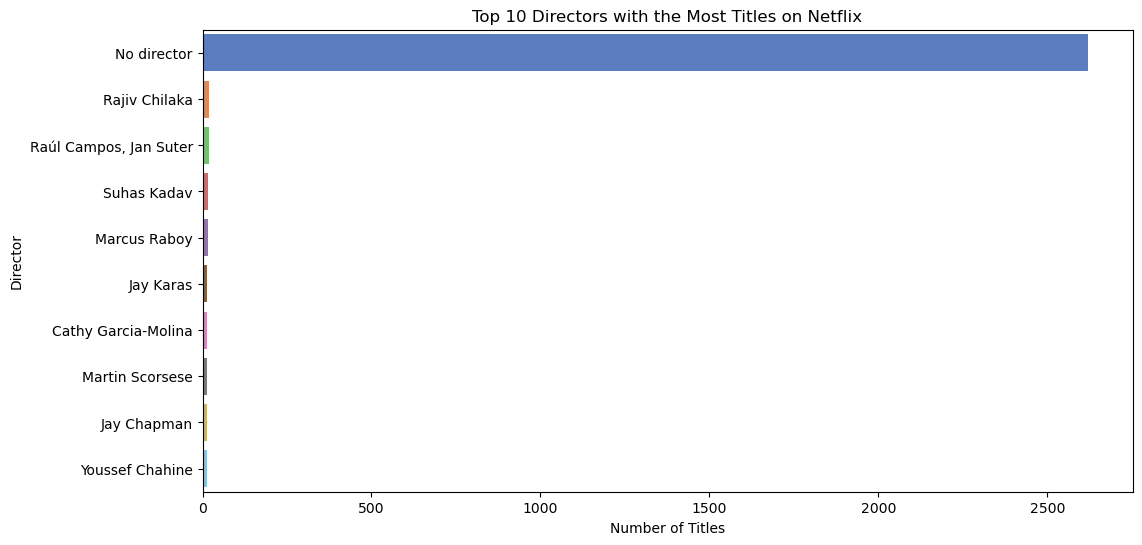

In [30]:
#Directors with the Most Titles
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='muted')
plt.title('Top 10 Directors with the Most Titles on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# -> Some directors have a significant number of titles available on Netflix, with Jan Suter being the director with the most titles. This suggests that certain directors have a strong presence in the Netflix library.


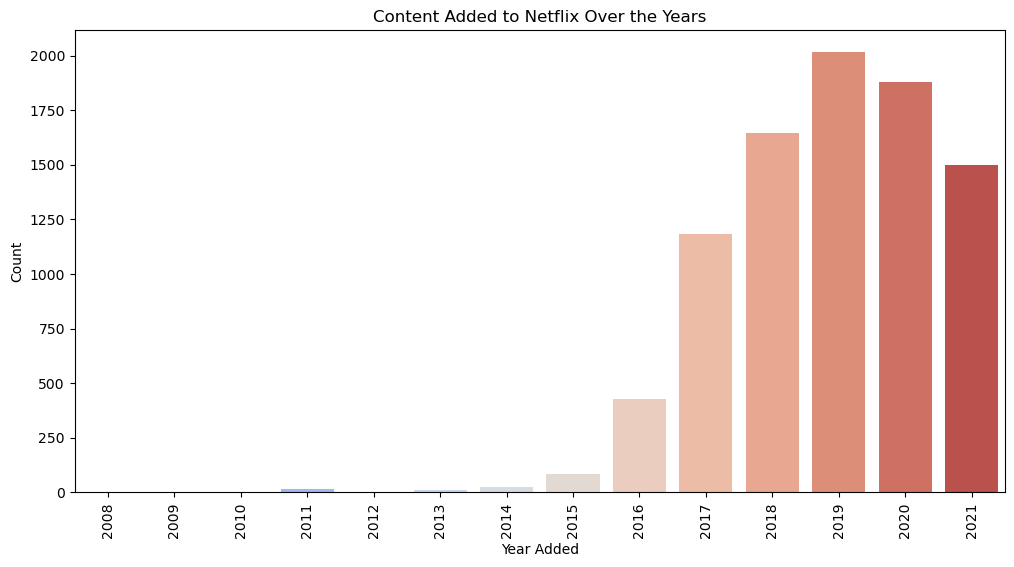

In [31]:
#Content Added Over the Years
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# ->Netflix has been consistently adding more content each year, with a significant increase in recent years, reflecting the platform's growth.

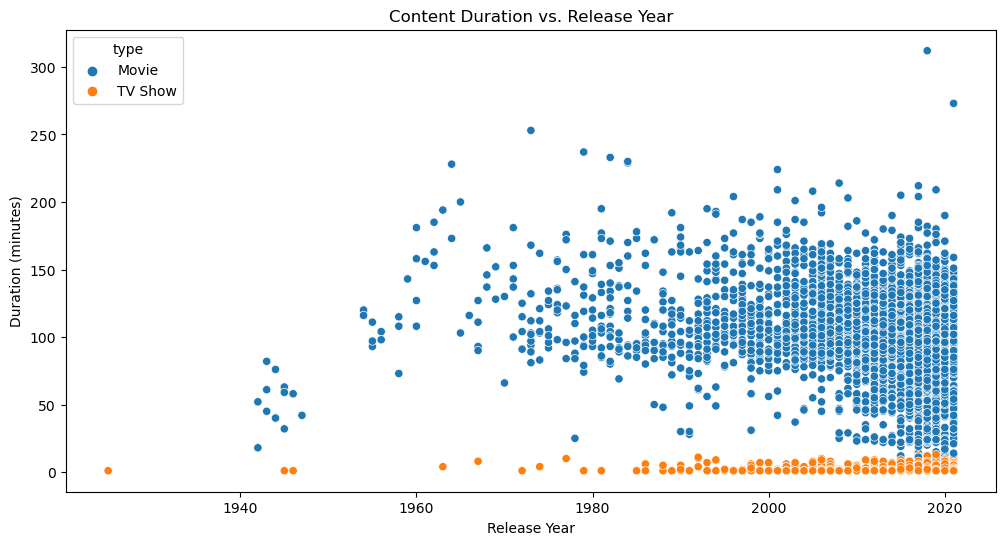

In [32]:
#Content Duration vs. Release Year
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='release_year', y='duration', hue='type')
plt.title('Content Duration vs. Release Year')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.show()

# ->There is no strong correlation between the release year and content duration. Netflix offers a diverse range of content with varying durations across different release years.

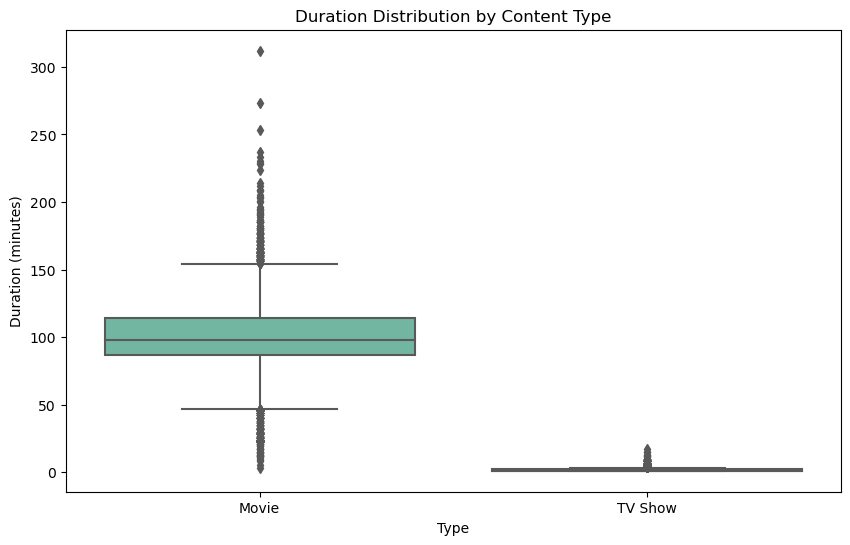

In [33]:
#Rating vs. Content Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='duration', data=df, palette='Set2')
plt.title('Duration Distribution by Content Type')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()



# ->Movies tend to have a wider range of durations compared to TV shows on Netflix. 
# ->TV shows typically have more consistent episode lengths.

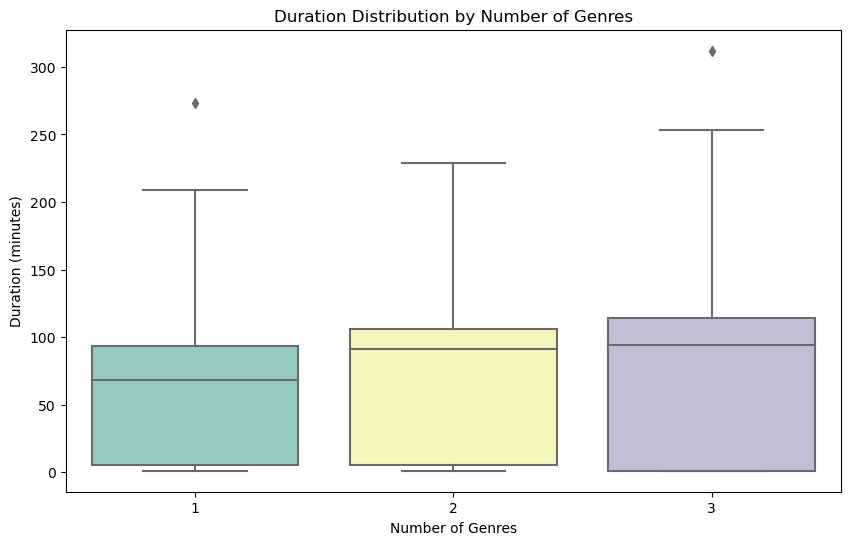

In [34]:
#Analyzing Content with Multiple Genres
df['num_genres'] = df['listed_in'].str.split(', ').apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='num_genres', y='duration', data=df, palette='Set3')
plt.title('Duration Distribution by Number of Genres')
plt.xlabel('Number of Genres')
plt.ylabel('Duration (minutes)')
plt.show()

# ->Content with multiple genres tends to have slightly longer durations, suggesting that more diverse genres may lead to longer viewing experiences.

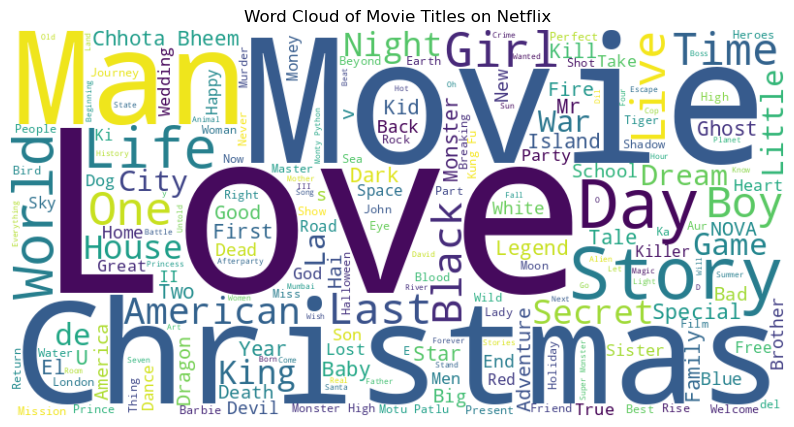

In [35]:
#Word Cloud of Movie Titles
from wordcloud import WordCloud

movie_titles = ' '.join(df[df['type'] == 'Movie']['title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles on Netflix')
plt.show()


# ->The word cloud of movie titles shows that terms like "love," "life," "story," and "man" are commonly used in Netflix movie titles, reflecting the diversity of movie themes.

/tmp/ipykernel_20/3365610541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


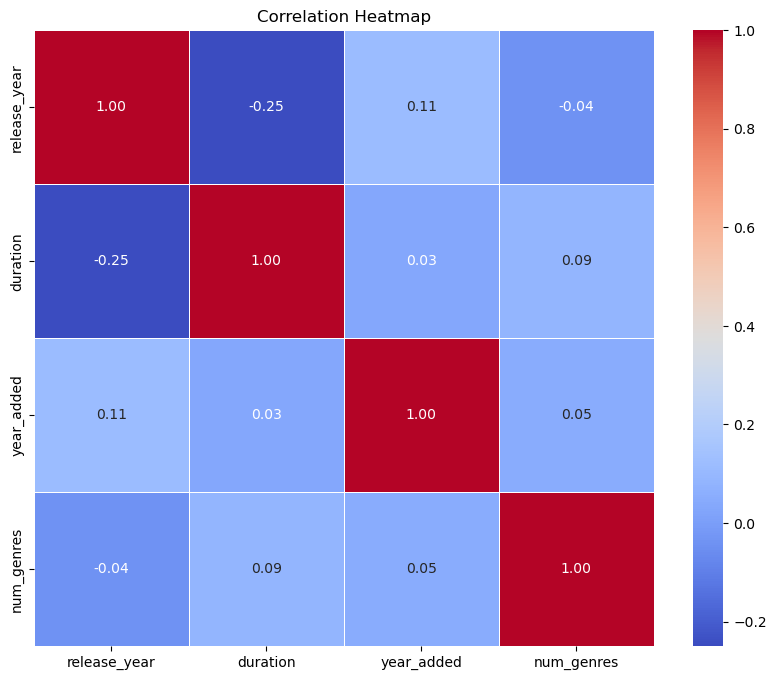

In [36]:
#Heatmap of Content Correlation
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# ->There is no strong linear correlation between numerical variables in the dataset, indicating that these variables are largely independent of each other.

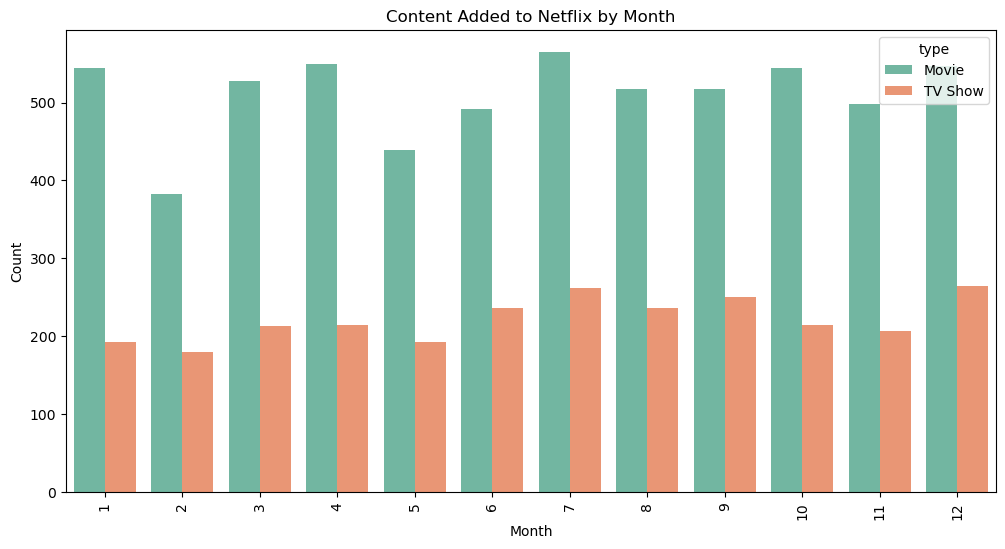

In [37]:
#Content Released by Month
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='month_added', data=df, palette='Set2', hue='type')
plt.title('Content Added to Netflix by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# ->The distribution of content added by month indicates that Netflix tends to release content more evenly throughout the year, with a slight peak in the summer months.


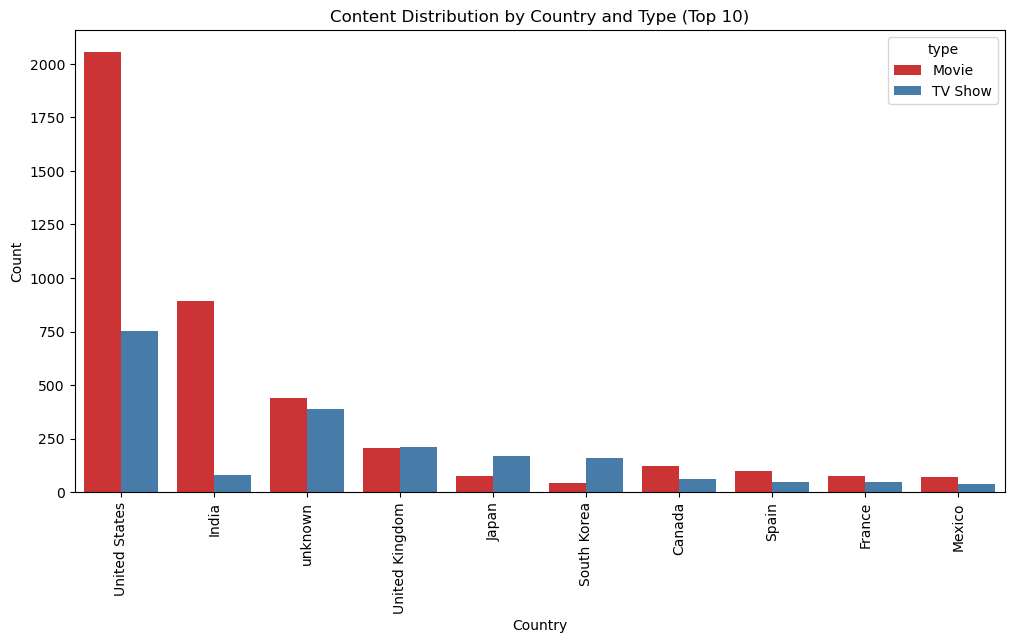

In [38]:
#Content Distribution by Country and Type
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df, hue='type', order=df['country'].value_counts().iloc[:10].index, palette='Set1')
plt.title('Content Distribution by Country and Type (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# ->The analysis of content distribution by country and type shows that the United States contributes the most content to Netflix, with a significant portion being movies. Other countries also have diverse content offerings.


#                                                  THANK YOU